In [1]:
%cd ..

/home/sumit/Desktop/GitHub/Insurance-Analysis


In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [29]:
import zipfile
with zipfile.ZipFile("data/IR_raw_data.zip", 'r') as zip_ref:
    zip_ref.extractall("data/")
   

In [3]:
# reading the data
data_backup = pd.read_csv("data/IR_raw_data.csv", index_col="id")

In [4]:
data = data_backup.copy(deep=True)
data.head()

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
id,,,,,,,,,,,,,,,,,,,,
0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,Premium,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,Comprehensive,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,Premium,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,Basic,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,Premium,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0


In [5]:
# checking data types
data.dtypes

Age                     float64
Gender                   object
Annual Income           float64
Marital Status           object
Number of Dependents    float64
Education Level          object
Occupation               object
Health Score            float64
Location                 object
Policy Type              object
Previous Claims         float64
Vehicle Age             float64
Credit Score            float64
Insurance Duration      float64
Policy Start Date        object
Customer Feedback        object
Smoking Status           object
Exercise Frequency       object
Property Type            object
Premium Amount          float64
dtype: object

In [6]:
data.shape

(1200000, 20)

In [7]:
null_data = {}
for col in data.columns:
    percent_of_nulls = round((data[col].isnull().sum() / data.shape[0])*100,4)
    null_data[col] = percent_of_nulls

null_data = pd.DataFrame.from_dict(null_data, orient='index', columns=['Percent_Null'])
null_data = null_data.sort_values(by='Percent_Null', ascending=False)
print(null_data)
    

                      Percent_Null
Previous Claims            30.3358
Occupation                 29.8396
Credit Score               11.4902
Number of Dependents        9.1393
Customer Feedback           6.4853
Health Score                6.1730
Annual Income               3.7458
Age                         1.5588
Marital Status              1.5441
Vehicle Age                 0.0005
Insurance Duration          0.0001
Gender                      0.0000
Location                    0.0000
Policy Type                 0.0000
Education Level             0.0000
Policy Start Date           0.0000
Smoking Status              0.0000
Exercise Frequency          0.0000
Property Type               0.0000
Premium Amount              0.0000


In [8]:
data = data.drop(columns=['Previous Claims','Occupation'])
cols_to_fill = ['Credit Score','Number of Dependents','Customer Feedback', 'Health Score', 'Annual Income','Age','Marital Status','Vehicle Age','Insurance Duration']

In [9]:
for col in data.select_dtypes('object').columns:
    print(data[col].value_counts())

Gender
Male      602571
Female    597429
Name: count, dtype: int64
Marital Status
Single      395391
Married     394316
Divorced    391764
Name: count, dtype: int64
Education Level
Master's       303818
PhD            303507
Bachelor's     303234
High School    289441
Name: count, dtype: int64
Location
Suburban    401542
Rural       400947
Urban       397511
Name: count, dtype: int64
Policy Type
Premium          401846
Comprehensive    399600
Basic            398554
Name: count, dtype: int64
Policy Start Date
2020-02-08 15:21:39.134960    142
2023-08-13 15:21:39.155231    137
2022-02-02 15:21:39.134960    137
2022-08-30 15:21:39.134960    134
2023-11-02 15:21:39.134960    118
                             ... 
2022-11-09 15:21:39.101733      1
2019-09-09 15:21:39.101733      1
2020-06-06 15:21:39.278180      1
2024-06-06 15:21:39.197445      1
2019-09-06 15:21:39.133866      1
Name: count, Length: 167381, dtype: int64
Customer Feedback
Average    377905
Poor       375518
Good       3687

In [10]:
data['Policy Start Date'] = pd.to_datetime(data['Policy Start Date'])

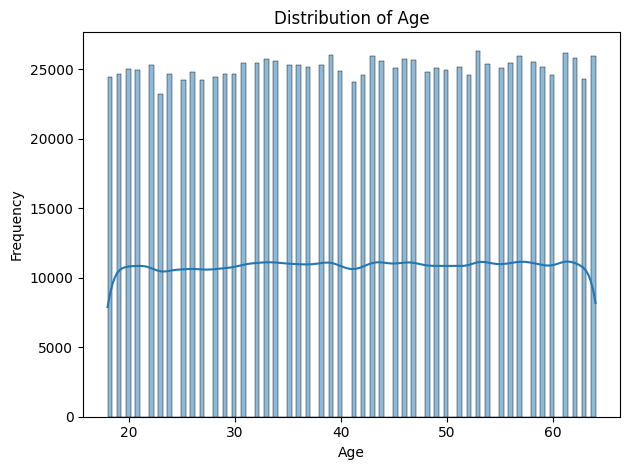

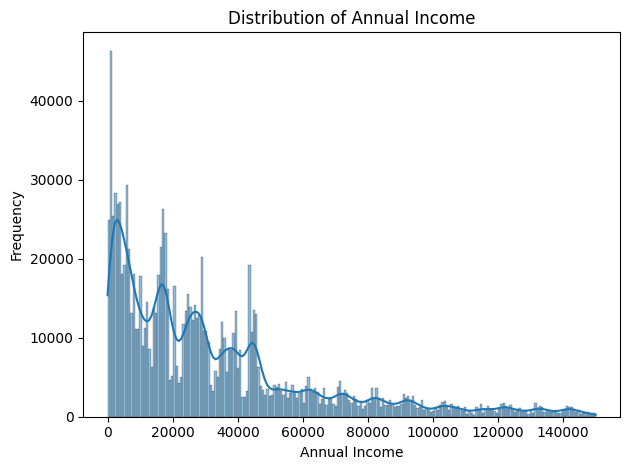

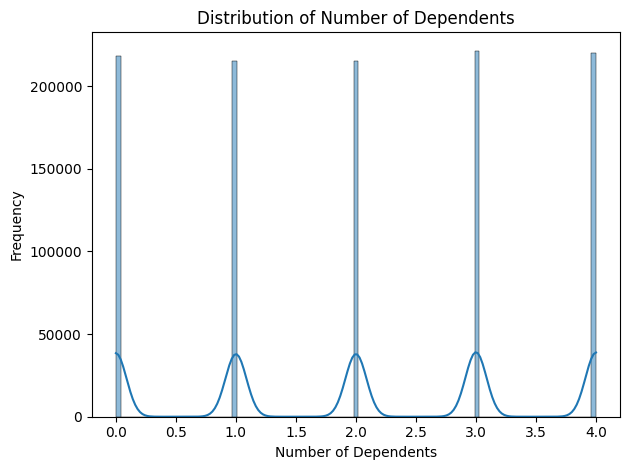

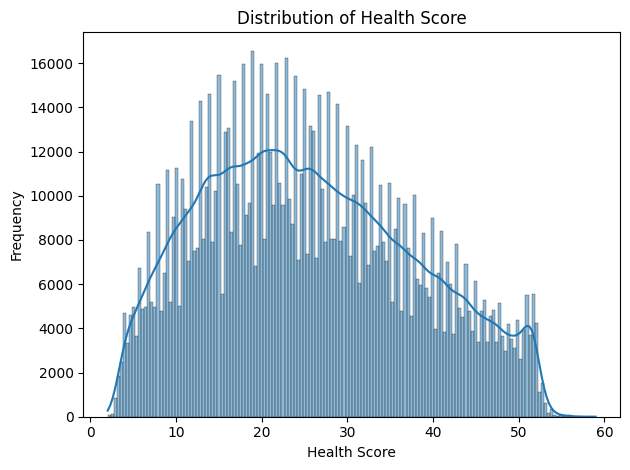

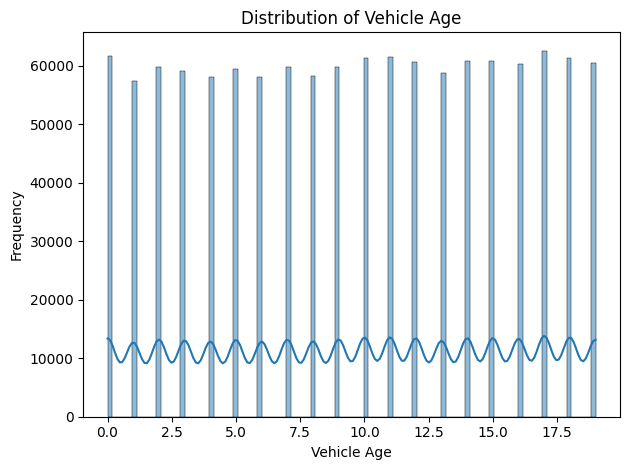

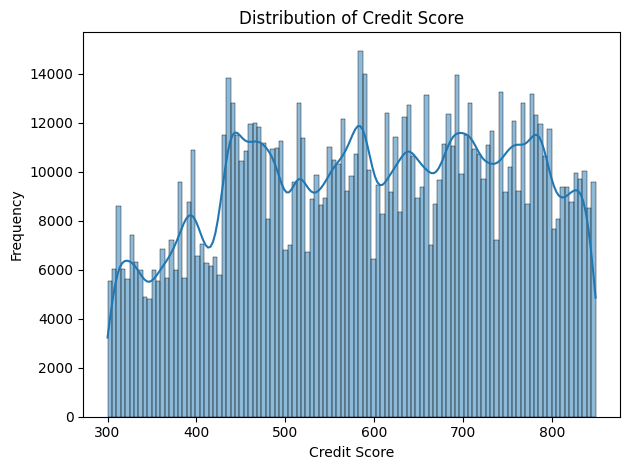

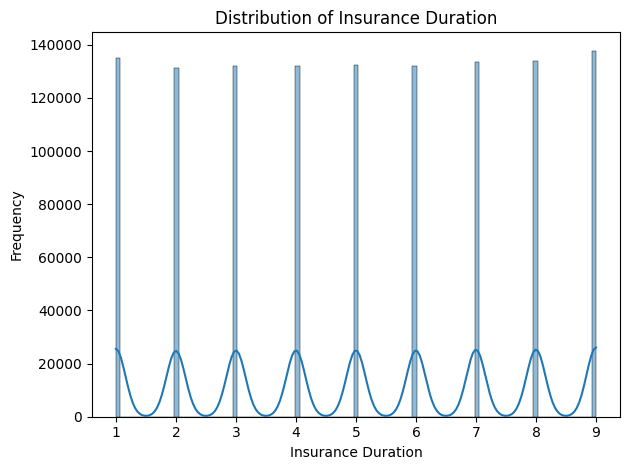

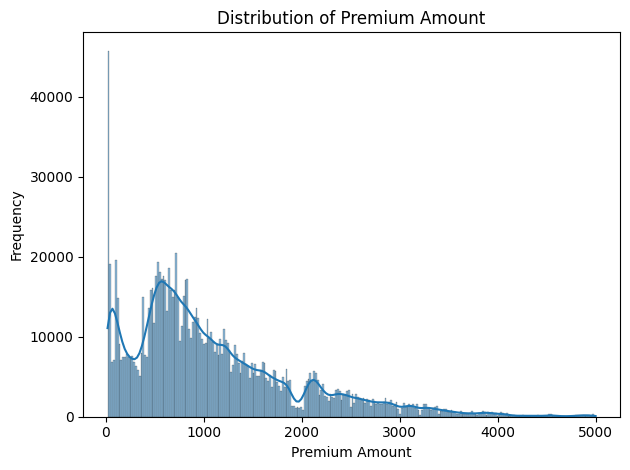

In [11]:
for col in data.select_dtypes(include='number').columns:
    plt.figure()
    sns.histplot(data=data, x=col, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

Cat columns - Number of dependents, vehicle age, insurance duration

In [12]:
convert_to_cat = ['Number of Dependents','Vehicle Age','Insurance Duration']
for col in convert_to_cat:
    data[col] = data[col].astype('category')

In [13]:
data['Policy Age in days'] = (pd.Timestamp.today().normalize() - data['Policy Start Date']).dt.days
data['Policy Age in weeks'] = (pd.Timestamp.today().normalize() - data['Policy Start Date']).dt.days//7
data['Policy Age in months'] = (pd.Timestamp.today().normalize() - data['Policy Start Date']).dt.days//30

In [14]:
data = data.drop(columns='Policy Start Date')

In [15]:
data.head()

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Health Score,Location,Policy Type,Vehicle Age,Credit Score,Insurance Duration,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount,Policy Age in days,Policy Age in weeks,Policy Age in months
id,,,,,,,,,,,,,,,,,,,,
0,19.0,Female,10049.0,Married,1.0,Bachelor's,22.598761,Urban,Premium,17.0,372.0,5.0,Poor,No,Weekly,House,2869.0,582,83,19
1,39.0,Female,31678.0,Divorced,3.0,Master's,15.569731,Rural,Comprehensive,12.0,694.0,2.0,Average,Yes,Monthly,House,1483.0,776,110,25
2,23.0,Male,25602.0,Divorced,3.0,High School,47.177549,Suburban,Premium,14.0,NaN,3.0,Good,Yes,Weekly,House,567.0,666,95,22
3,21.0,Male,141855.0,Married,2.0,Bachelor's,10.938144,Rural,Basic,0.0,367.0,1.0,Poor,Yes,Daily,Apartment,765.0,410,58,13
4,21.0,Male,39651.0,Single,1.0,Bachelor's,20.376094,Rural,Premium,8.0,598.0,4.0,Poor,Yes,Weekly,House,2022.0,1334,190,44


cols_to_fill = ['Credit Score','Number of Dependents','Customer Feedback', 'Health Score', 'Annual Income','Age','Marital Status','Vehicle Age','Insurance Duration']


In [16]:
data.dtypes

Age                      float64
Gender                    object
Annual Income            float64
Marital Status            object
Number of Dependents    category
Education Level           object
Health Score             float64
Location                  object
Policy Type               object
Vehicle Age             category
Credit Score             float64
Insurance Duration      category
Customer Feedback         object
Smoking Status            object
Exercise Frequency        object
Property Type             object
Premium Amount           float64
Policy Age in days         int64
Policy Age in weeks        int64
Policy Age in months       int64
dtype: object

In [17]:
fill_strategy = {
    'Credit Score': 'sample',
    'Number of Dependents': 'mode',
    'Customer Feedback': 'mode',
    'Health Score': 'sample',
    'Annual Income': 'sample',
    'Age': 'sample',
    'Marital Status': 'mode',
    'Vehicle Age': 'mode',
    'Insurance Duration': 'mode'
}

for col, method in fill_strategy.items():
    if method == 'sample':
        # Sample with replacement from non-null values
        non_null_values = data[col].dropna()
        num_missing = data[col].isna().sum()
        sampled_values = non_null_values.sample(num_missing, replace=True, random_state=42).values

        # Replace missing values with sampled values
        data.loc[data[col].isna(), col] = sampled_values

    elif method == 'mode':
        fill_val = data[col].mode()[0]

        if isinstance(data[col].dtype, pd.CategoricalDtype):
            if fill_val not in data[col].cat.categories:
                data[col] = data[col].cat.add_categories([fill_val])

        data[col] = data[col].fillna(fill_val)

In [18]:
data.to_csv("data/Cleaned_Data.csv")